
# Testing the range of validity of the Wilks theorem

Credit to https://stephens999.github.io/fiveMinuteStats/wilks.html for the original R version of this script


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import math

%matplotlib inline

Setup the number of pseudoexperiments, the number of observations per pseudoexperiment, and the true value of the parameter

In [2]:
n_pseudoexperiments=10

# Poisson lambda
lam=0.4

# Lazily do it in one go
n_observations=[10, 100, 1000]


Core of the algorithm.
Generate N pseudoexperiments of nsampl observations each, and then plot.

Running pseudoexperiments for 10 observations


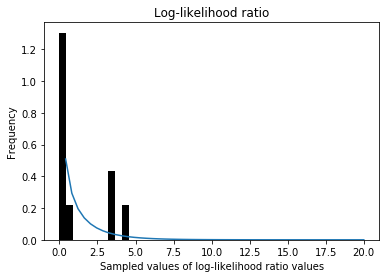

Running pseudoexperiments for 100 observations


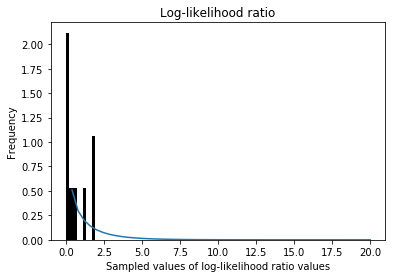

Running pseudoexperiments for 1000 observations


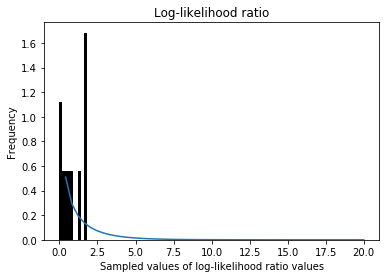

In [3]:
for nsampl in n_observations:
    samples=np.zeros(n_pseudoexperiments)
    print("Running pseudoexperiments for {nsampl} observations".format(nsampl=nsampl))
    for toy in range(1, n_pseudoexperiments):
        #print("      Toy #{toy}".format(toy=toy))
        # Sample nsampl observations from a Poisson(0.4)   
        pseudodata=np.random.poisson(size=nsampl, lam=lam)
        samples[toy] = 2*nsampl*(pseudodata.mean()*math.log(pseudodata.mean()/lam) + lam - pseudodata.mean())         

    fix, ax = plt.subplots(1,1)
    # It seems easier to normalize the histogram than the chi2
    plt.hist(samples, density=True, color="black")
    plt.xlabel("Sampled values of log-likelihood ratio values")
    plt.ylabel("Frequency")
    plt.title("Log-likelihood ratio")
    x = np.linspace(0,20)
    plt.plot(x,ss.chi2.pdf(x,1))
    plt.show()

Now plot everything